In [174]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [175]:
def showImage(img, title=''):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if(title != ''):
        plt.title(title)

    plt.imshow(img)
    plt.show()

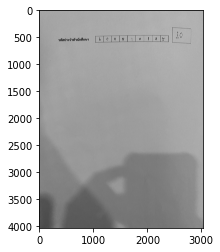

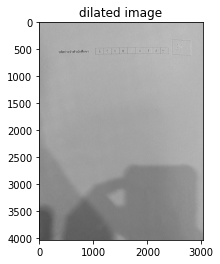

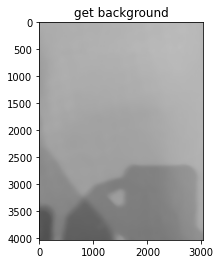

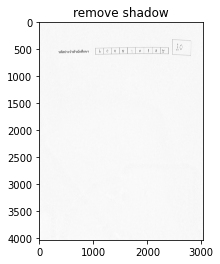

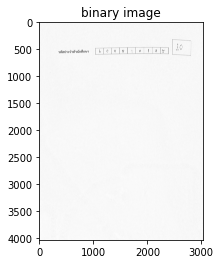

In [176]:
class Pre_Processing:

    def __init__(self, img, debug=False):
        self.debug = debug 

        self.image =  img
        self.gray_image = self.convertColorSpace(self.image)
        self.remove_shadow_image = self.removeShadow(self.gray_image)
        self.binary_image = self.convert2binaryImage(self.remove_shadow_image)

    def convertColorSpace(self, img):
        image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        if(self.debug):
            showImage(image)

        return image

    def removeShadow(self, gray_img):
        dilated_img = cv2.dilate(gray_img, np.ones((7,7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 99)
        diff_img = 255 - cv2.absdiff(gray_img, bg_img)
        norm_img = diff_img.copy()
        cv2.normalize(diff_img, norm_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)


        if(self.debug):
            showImage(dilated_img, 'dilated image')
            showImage(bg_img, 'get background')
            showImage(diff_img, 'remove shadow')
        
        return diff_img

    def convert2binaryImage(self, gray_img):
        _, thresh_img = cv2.threshold(gray_img, 255, 0, cv2.THRESH_TRUNC)
        if(self.debug):
            showImage(thresh_img, 'binary image')
        return thresh_img


if __name__ == "__main__":
    image = cv2.imread('image_test/test1.JPG')
    Pre_Processing(image, True)
